# Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.   

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.


## Dataset Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms.


## Output or Label information

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

## Goal

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

! pip install nltk

In [2]:
import nltk

nltk.download('punkt')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
print("Shape of both the Datasets is:- ")
print(df.shape)
print(df_test.shape)

Shape of both the Datasets is:- 
(159571, 8)
(153164, 2)


In [7]:
for col in df:
    print('{} : {}'.format(col,df[col].unique()))

id : ['0000997932d777bf' '000103f0d9cfb60f' '000113f07ec002fd' ...
 'ffee36eab5c267c9' 'fff125370e4aaaf3' 'fff46fc426af1f9a']
comment_text : ["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don

In [8]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [9]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [12]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [13]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [14]:
from nltk.tokenize import regexp_tokenize

In [15]:
from nltk.corpus import stopwords

In [16]:
data_num = df.select_dtypes(include=[np.number])

In [17]:
data_num

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [18]:
for i in data_num.columns:
    print(i)
    print("number of Clean words in the speech",data_num[i].value_counts()[0])
    print("number of",i,"words in the speech",data_num[i].value_counts()[1])
    print('\n')

malignant
number of Clean words in the speech 144277
number of malignant words in the speech 15294


highly_malignant
number of Clean words in the speech 157976
number of highly_malignant words in the speech 1595


rude
number of Clean words in the speech 151122
number of rude words in the speech 8449


threat
number of Clean words in the speech 159093
number of threat words in the speech 478


abuse
number of Clean words in the speech 151694
number of abuse words in the speech 7877


loathe
number of Clean words in the speech 158166
number of loathe words in the speech 1405




malignant




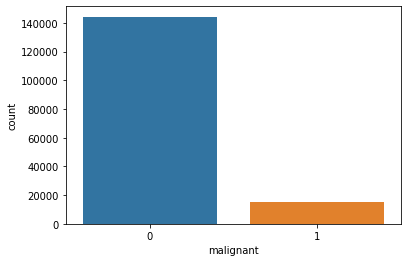

highly_malignant




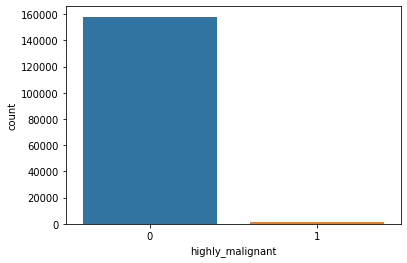

rude




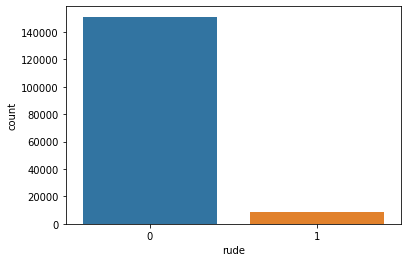

threat




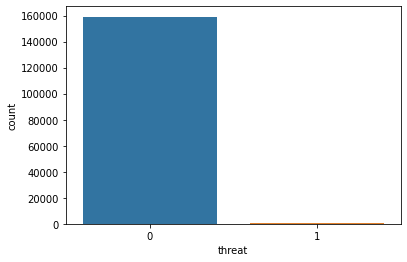

abuse




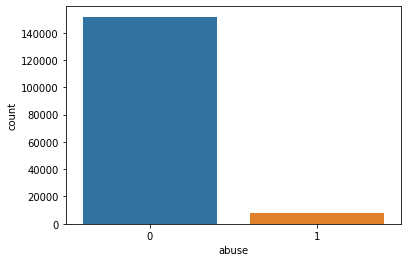

loathe




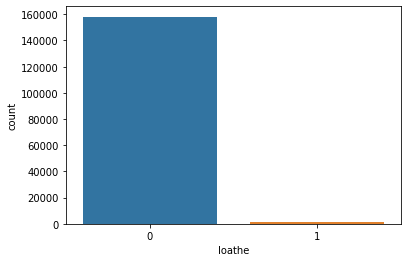

In [19]:
for i in data_num.columns:
    print(i)
    sns.countplot(data_num[i])
    print("\n")
    plt.show()

In [20]:
data_obj = df.select_dtypes(include=('object'))

In [21]:
data_obj

,id,comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember..."
...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ..."
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ..."
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...


In [22]:
import string

In [23]:
data_obj['comment_text'].str.len()

0         264
1         112
2         233
3         622
4          67
         ... 
159566    295
159567     99
159568     81
159569    116
159570    189
Name: comment_text, Length: 159571, dtype: int64

In [24]:
data_obj['String_Length'] = data_obj['comment_text'].str.len()

In [25]:
data_obj

,id,comment_text,String_Length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",67
...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,116


In [26]:
print('{} : {}'.format(col,data_obj["comment_text"].unique()))

loathe : ["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, 

In [27]:
#Converting the text into lower case. 
df["comment_text"] = df["comment_text"].str.lower()

In [28]:
#checking for special characters if any in the comment_text
# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [29]:
# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [30]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollars')

In [31]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [32]:
# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')

In [33]:
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [34]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [35]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
from nltk.stem import WordNetLemmatizer

In [37]:
lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [38]:
df["Comment_strng_Length"] = data_obj['String_Length']

In [39]:
df['clean_length'] = df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_strng_Length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [40]:
#Total length removal
print ('Origin Length', df.Comment_strng_Length.sum())
print ('Clean Length', df.clean_length.sum())

Origin Length 62893130
Clean Length 43575155


pip install wordcloud

In [43]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [44]:
from nltk.tokenize import word_tokenize

In [45]:
#Total length removal
print ('Origin Length', df.Comment_strng_Length.sum())
print ('Clean Length', df.clean_length.sum())

Origin Length 62893130
Clean Length 43575155


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc,f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

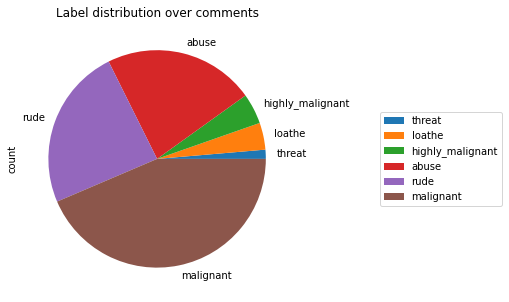

In [47]:
cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']

df_distribution = data_num[cols].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                         title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))  #Creating the pie plot

In [57]:
target_data = df[cols]
df['bad'] = df[cols].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


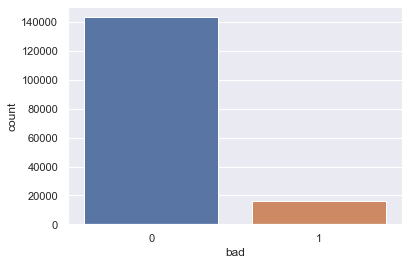

In [59]:
sns.set()
sns.countplot(x="bad" , data = df)
plt.show()

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])
x = features

In [61]:
df.shape 

(159571, 11)

In [62]:
df_test.shape

(153164, 2)

In [63]:
y=df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=.30)

In [64]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [65]:
#LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.95987430505197
Test accuracy is 0.9548379010695187
[[42725   248]
 [ 1914  2985]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42973
           1       0.92      0.61      0.73      4899

    accuracy                           0.95     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [66]:
#DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987197736774724
Test accuracy is 0.9399440173796791
[[41667  1306]
 [ 1569  3330]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42973
           1       0.72      0.68      0.70      4899

    accuracy                           0.94     47872
   macro avg       0.84      0.82      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [67]:
#RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987018684142204
Test accuracy is 0.9558823529411765
[[42457   516]
 [ 1596  3303]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42973
           1       0.86      0.67      0.76      4899

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [68]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9502144155274443
Test accuracy is 0.9483622994652406
[[42568   405]
 [ 2067  2832]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42973
           1       0.87      0.58      0.70      4899

    accuracy                           0.95     47872
   macro avg       0.91      0.78      0.83     47872
weighted avg       0.95      0.95      0.94     47872



In [69]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9218256206411874
Test accuracy is 0.9186580882352942
[[42829   144]
 [ 3750  1149]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42973
           1       0.89      0.23      0.37      4899

    accuracy                           0.92     47872
   macro avg       0.90      0.62      0.66     47872
weighted avg       0.92      0.92      0.90     47872



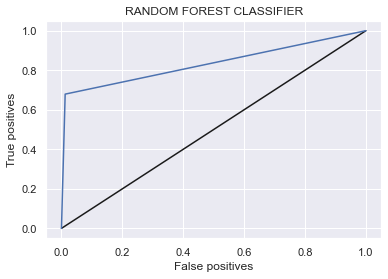

In [78]:
#Plotting the area under curve Graph, more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positives')
plt.ylabel('True positives')
plt.title('RANDOM FOREST CLASSIFIER')
plt.show()

!pip install eli5

In [79]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest classifier
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0727 ± 0.0585,fuck
0.0377 ± 0.0423,fucking
0.0289 ± 0.0316,shit
0.0228 ± 0.0177,suck
0.0196 ± 0.0145,stupid
0.0192 ± 0.0117,idiot
0.0171 ± 0.0201,bitch
0.0165 ± 0.0142,asshole
0.0121 ± 0.0124,cunt
0.0112 ± 0.0100,dick


In [81]:
test_data =tf_vec.fit_transform(df_test['comment_text']) #test data (comments) converted to vectors
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [82]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])